In [1]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rishi\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [2]:
#getting all gernes + Urls from the main page
import requests
from bs4 import BeautifulSoup

base = "http://books.toscrape.com/"
response = requests.get(base)
soup = BeautifulSoup(response.content, "html.parser")

# Find the genre list section
genre_list = soup.find("ul", class_="nav nav-list").find("ul")

genres = genre_list.find_all("li")

genre_dict = {}
for genre in genres:
    genre_name = genre.a.text.strip()
    genre_url = base + genre.find("a")["href"]
    genre_dict[genre_name] = genre_url

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Example genre URL (Travel)
url = "http://books.toscrape.com/catalogue/category/books/travel_2/index.html"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

books = soup.find_all("article", class_="product_pod")

book_list = []

for book in books:
    # Title
    title = book.h3.a["title"]
    
    # Price
    price = book.find("p", class_="price_color").text
    price = price.replace("£", "").strip()
    
    # Rating (class names like "star-rating Three")
    rating_class = book.find("p", class_="star-rating")["class"]
    rating = rating_class[1]  # e.g., 'Three'

    # Availability
    availability = book.find("p", class_="instock availability").text.strip()

    book_list.append({
        "Title": title,
        "Price": float(price),
        "Rating": rating,
        "Availability": availability
    })

df = pd.DataFrame(book_list)
print(df)


                                                Title  Price Rating  \
0                             It's Only the Himalayas  45.17    Two   
1   Full Moon over Noah’s Ark: An Odyssey to Mount...  49.43   Four   
2   See America: A Celebration of Our National Par...  48.87  Three   
3   Vagabonding: An Uncommon Guide to the Art of L...  36.94    Two   
4                                Under the Tuscan Sun  37.33  Three   
5                                  A Summer In Europe  44.34    Two   
6                            The Great Railway Bazaar  30.54    One   
7                    A Year in Provence (Provence #1)  56.88   Four   
8   The Road to Little Dribbling: Adventures of an...  23.21    One   
9           Neither Here nor There: Travels in Europe  38.95  Three   
10                 1,000 Places to See Before You Die  26.08   Five   

   Availability  
0      In stock  
1      In stock  
2      In stock  
3      In stock  
4      In stock  
5      In stock  
6      In stock  
7  

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin

def scrape_genre(genre_url):
    all_books = []
    
    while True:
        print(f"Scraping: {genre_url}")
        response = requests.get(genre_url)
        soup = BeautifulSoup(response.content, "html.parser")
        
        books = soup.find_all("article", class_="product_pod")
        
        for book in books:
            title = book.h3.a["title"]
            price = book.find("p", class_="price_color").text.replace("£", "").strip()
            rating_class = book.find("p", class_="star-rating")["class"]
            rating = rating_class[1]
            availability = book.find("p", class_="instock availability").text.strip()
            
            all_books.append({
                "Title": title,
                "Price": float(price),
                "Rating": rating,
                "Availability": availability
            })
        
        # Check if there's a next page
        next_button = soup.find("li", class_="next")
        if next_button:
            next_link = next_button.a["href"]
            genre_url = urljoin(genre_url, next_link)  # handle relative links
        else:
            break
    
    return pd.DataFrame(all_books)

# Example: scrape "Travel" genre
travel_url = "http://books.toscrape.com/catalogue/category/books/travel_2/index.html"
df_travel = scrape_genre(travel_url)

print(df_travel.head())


Scraping: http://books.toscrape.com/catalogue/category/books/travel_2/index.html
                                               Title  Price Rating  \
0                            It's Only the Himalayas  45.17    Two   
1  Full Moon over Noah’s Ark: An Odyssey to Mount...  49.43   Four   
2  See America: A Celebration of Our National Par...  48.87  Three   
3  Vagabonding: An Uncommon Guide to the Art of L...  36.94    Two   
4                               Under the Tuscan Sun  37.33  Three   

  Availability  
0     In stock  
1     In stock  
2     In stock  
3     In stock  
4     In stock  


In [5]:
import os
from datetime import datetime

# -----------------------------------------
# df_travel  ← your DataFrame from scrape
# genre_name ← pull from the URL or pick manually
# -----------------------------------------
genre_name = "travel"                 # keep it lowercase & underscore‐free
today      = datetime.now().strftime("%Y-%m-%d")

# build a neat file name, e.g. travel_2025-06-01.csv
fname = f"{genre_name}_{today}.csv"

# OPTIONAL: put everything in a dedicated folder
os.makedirs("scraped_books", exist_ok=True)
path = os.path.join("scraped_books", fname)

df_travel.to_csv(path, index=False)
print(f"✓ Saved {len(df_travel)} rows → {path}")


✓ Saved 11 rows → scraped_books\travel_2025-06-01.csv


In [6]:
all_dfs = []           # collect each genre DataFrame here

for name, url in genre_dict.items():   # genre_dict came from Step 1
    df = scrape_genre(url)
    df["Genre"] = name                 # add a genre column
    all_dfs.append(df)

master_df = pd.concat(all_dfs, ignore_index=True)

master_df.to_csv("all_genres_books.csv", index=False)
print("✓ Combined file saved as all_genres_books.csv")


Scraping: http://books.toscrape.com/catalogue/category/books/travel_2/index.html
Scraping: http://books.toscrape.com/catalogue/category/books/mystery_3/index.html
Scraping: http://books.toscrape.com/catalogue/category/books/mystery_3/page-2.html
Scraping: http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html
Scraping: http://books.toscrape.com/catalogue/category/books/historical-fiction_4/page-2.html
Scraping: http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html
Scraping: http://books.toscrape.com/catalogue/category/books/sequential-art_5/page-2.html
Scraping: http://books.toscrape.com/catalogue/category/books/sequential-art_5/page-3.html
Scraping: http://books.toscrape.com/catalogue/category/books/sequential-art_5/page-4.html
Scraping: http://books.toscrape.com/catalogue/category/books/classics_6/index.html
Scraping: http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html
Scraping: http://books.toscrape.com/cata

In [7]:
import pandas as pd

df = pd.read_csv("./scraped_books/travel_2025-06-01.csv")
print(df.head())
print(df.shape)          # (rows, columns)

                                               Title  Price Rating  \
0                            It's Only the Himalayas  45.17    Two   
1  Full Moon over Noah’s Ark: An Odyssey to Mount...  49.43   Four   
2  See America: A Celebration of Our National Par...  48.87  Three   
3  Vagabonding: An Uncommon Guide to the Art of L...  36.94    Two   
4                               Under the Tuscan Sun  37.33  Three   

  Availability  
0     In stock  
1     In stock  
2     In stock  
3     In stock  
4     In stock  
(11, 4)


In [8]:
print(df["Price"].describe())

# Count of books per star-rating
print(df["Rating"].value_counts())

# How many are in stock vs. out of stock?
print(df["Availability"].value_counts())

count    11.000000
mean     39.794545
std      10.394198
min      23.210000
25%      33.740000
50%      38.950000
75%      47.020000
max      56.880000
Name: Price, dtype: float64
Two      3
Three    3
Four     2
One      2
Five     1
Name: Rating, dtype: int64
In stock    11
Name: Availability, dtype: int64


In [9]:
avg_price_by_rating = (
    df.groupby("Rating")["Price"]
      .mean()
      .reset_index()
      .sort_values("Price", ascending=False)
)
print(avg_price_by_rating)


  Rating      Price
1   Four  53.155000
4    Two  42.150000
3  Three  41.716667
2    One  26.875000
0   Five  26.080000


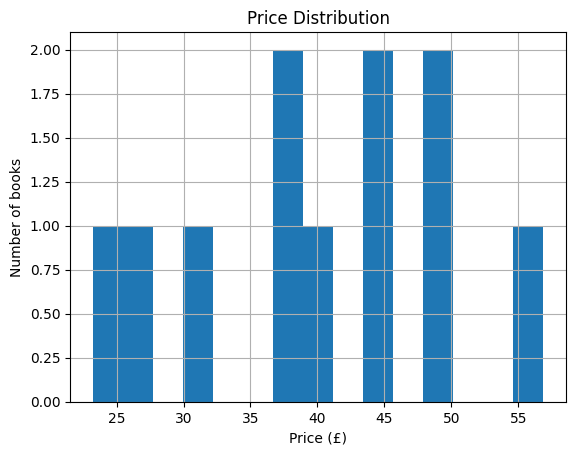

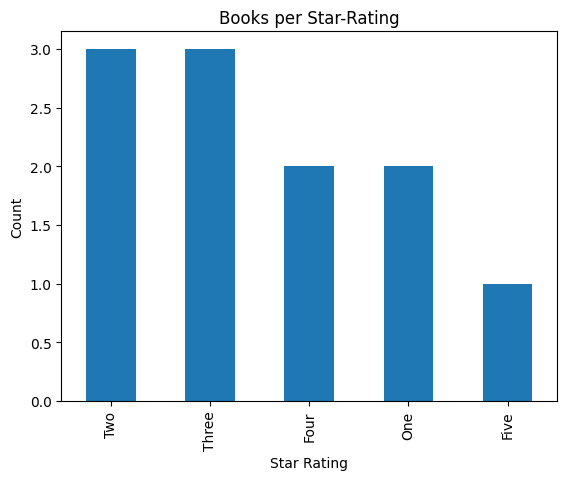

In [10]:
import matplotlib.pyplot as plt

# 1) Histogram of prices
df["Price"].hist(bins=15)
plt.title("Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Number of books")
plt.show()

# 2) Bar chart of rating counts
df["Rating"].value_counts().plot(kind="bar")
plt.title("Books per Star-Rating")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()


In [11]:
top10 = df.nlargest(10, "Price")[["Title", "Price", "Rating"]]
print(top10.to_string(index=False))

                                                              Title  Price Rating
                                   A Year in Provence (Provence #1)  56.88   Four
   Full Moon over Noah’s Ark: An Odyssey to Mount Ararat and Beyond  49.43   Four
 See America: A Celebration of Our National Parks & Treasured Sites  48.87  Three
                                            It's Only the Himalayas  45.17    Two
                                                 A Summer In Europe  44.34    Two
                          Neither Here nor There: Travels in Europe  38.95  Three
                                               Under the Tuscan Sun  37.33  Three
Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel  36.94    Two
                                           The Great Railway Bazaar  30.54    One
                                 1,000 Places to See Before You Die  26.08   Five


In [12]:
df_all = pd.read_csv("all_genres_books.csv")

# Average price per genre
avg_price_genre = (
    df_all.groupby("Genre")["Price"]
          .mean()
          .round(2)
          .sort_values(ascending=False)
)
print(avg_price_genre)

# Pivot table: median price by genre vs. rating
pivot = df_all.pivot_table(
    index="Genre",
    columns="Rating",
    values="Price",
    aggfunc="median"
).round(2)
print(pivot)


Genre
Suspense              58.33
Novels                54.81
Politics              53.61
Health                51.45
New Adult             46.38
Christian             42.50
Sports and Games      41.17
Self Help             40.62
Travel                39.79
Fantasy               39.59
Art                   38.52
Parenting             37.35
History               37.29
Autobiography         37.05
Womens Fiction        36.79
Cultural              36.58
Classics              36.55
Contemporary          36.20
Fiction               36.07
Poetry                35.97
Horror                35.95
Short Stories         35.88
Add a comment         35.80
Music                 35.64
Young Adult           35.45
Spirituality          35.10
Sequential Art        34.57
Default               34.39
Christian Fiction     34.38
Nonfiction            34.26
Psychology            34.22
Romance               33.93
Science Fiction       33.80
Biography             33.66
Historical Fiction    33.64
Philosophy    

In [13]:
with pd.ExcelWriter("book_insights.xlsx") as writer:
    df.to_excel(writer,  sheet_name="RawData",  index=False)
    avg_price_by_rating.to_excel(writer, sheet_name="AvgPriceStar")
    top10.to_excel(writer,         sheet_name="Top10Expensive", index=False)


In [14]:
# Break all titles into words
words = df["Title"].str.lower().str.split().explode()

# Count most common words (excluding stopwords)
common_words = words.value_counts()
print(common_words.head(20))


the           5
a             4
to            4
in            4
of            3
an            3
europe        2
see           2
#1)           1
adventures    1
dribbling:    1
little        1
road          1
provence      1
(provence     1
britain       1
year          1
bazaar        1
railway       1
great         1
Name: Title, dtype: int64


In [15]:
stopwords = {"the", "a", "and", "of", "to", "in", "for", "on", "with", "by"}
filtered = common_words[~common_words.index.isin(stopwords)]
print(filtered.head(20))


an            3
europe        2
see           2
#1)           1
adventures    1
dribbling:    1
little        1
road          1
provence      1
(provence     1
britain       1
year          1
bazaar        1
railway       1
great         1
american      1
before        1
(notes        1
places        1
from          1
Name: Title, dtype: int64


In [16]:
import glob

all_files = glob.glob("scraped_books/travel_*.csv")
dfs = []

for file in all_files:
    df = pd.read_csv(file)
    # Extract date from filename
    date_str = file.split("_")[-1].replace(".csv", "")
    df["ScrapeDate"] = date_str
    dfs.append(df)

combined = pd.concat(dfs)
combined["ScrapeDate"] = pd.to_datetime(combined["ScrapeDate"])


<AxesSubplot:title={'center':"Price Trend for: It's Only the Himalayas"}, xlabel='ScrapeDate'>

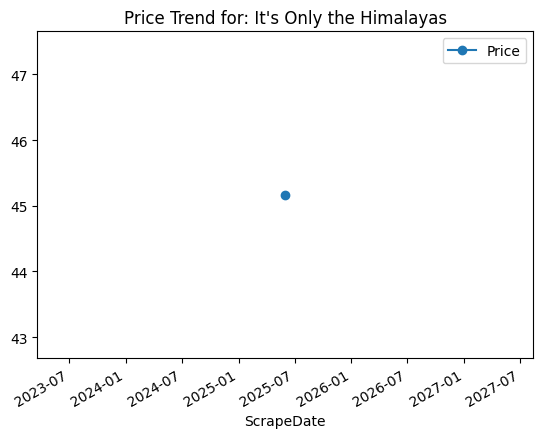

In [17]:
# Pick one book and plot its price over time
title = combined["Title"].value_counts().idxmax()  # most common title
book_df = combined[combined["Title"] == title]

book_df.sort_values("ScrapeDate").plot(
    x="ScrapeDate", y="Price", marker="o", title=f"Price Trend for: {title}"
)


In [18]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rishi\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [20]:
from textblob import TextBlob
import pandas as pd

# Example DataFrame with fake review data
df = pd.DataFrame({
    "Title": ["Book A", "Book B", "Book C"],
    "Rating": ["Five", "Two", "Four"],
    "Review": [
        "Absolutely amazing! A must-read for everyone.",
        "Terrible book. Waste of time and money.",
        "Interesting plot but slow pacing."
    ]
})

# Run sentiment analysis
df["Sentiment"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df)


    Title Rating                                         Review  Sentiment
0  Book A   Five  Absolutely amazing! A must-read for everyone.       0.75
1  Book B    Two        Terrible book. Waste of time and money.      -0.60
2  Book C   Four              Interesting plot but slow pacing.       0.10


<AxesSubplot:title={'center':'Avg Sentiment by Star Rating'}, xlabel='Rating'>

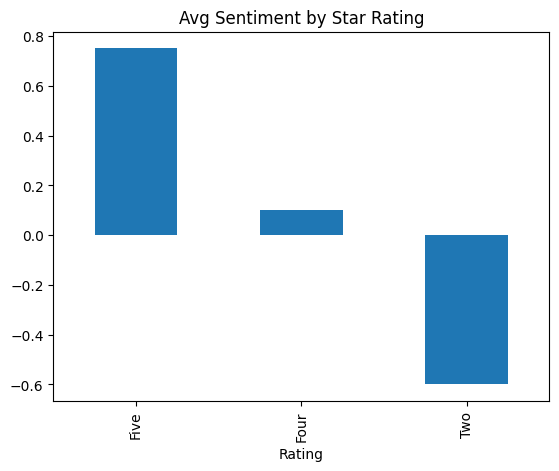

In [21]:
# Analyze average sentiment vs. rating
df.groupby("Rating")["Sentiment"].mean().plot(kind="bar", title="Avg Sentiment by Star Rating")
